In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-03-26 12:20:10.870508: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
hello = tf.constant('Hello, TensorFlow!')
tf.print(hello)


Hello, TensorFlow!


In [3]:
print(tf.__version__)

2.13.1


## Load the Dataset:
Here we will use minst dataset

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

## Define the Model:
Using a Sequential model with a couple of densely connected layers.

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


## Compile the model:
Choosing an optimizer and loos function for training

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Train the model
Fit model to training data

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1440 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0751 - accuracy: 0.9774


## Evaluate the model

In [8]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0763 - accuracy: 0.9764 - 394ms/epoch - 1ms/step


[0.07634260505437851, 0.9764000177383423]

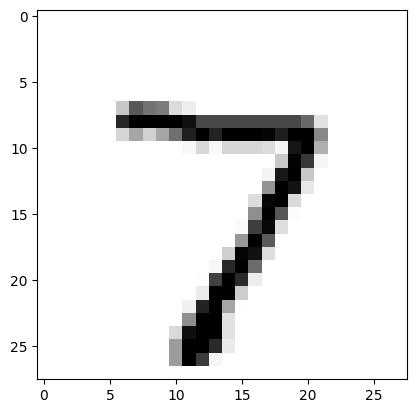

In [9]:
plt.imshow(x_test[0], 'Greys');

In [10]:
# Reshape the image to match the model's input shape
img_array = x_test[0].reshape(1, 28, 28)

# Predict
prediction = model.predict(img_array)

# Get the predicted class
predicted_digit = np.argmax(prediction[0])
print("Predicted digit:", predicted_digit)

1/1 [==============================] - 0s 79ms/step
Predicted digit: 7


In [11]:
# Select the first 10 images from the test dataset
img_batch = x_test[10:20]

# Predict
predictions = model.predict(img_batch)

# Get the predicted classes for each image
predicted_digits = np.argmax(predictions, axis=1)
print("Predicted digits:", predicted_digits)



1/1 [==============================] - 0s 19ms/step
Predicted digits: [0 6 9 0 1 5 9 7 3 4]


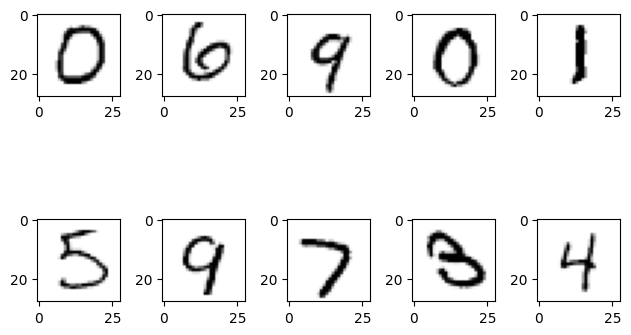

In [12]:
fig, ax = plt.subplots(2, 5)

for i, image in enumerate(x_test[10:20]):
    ax = plt.subplot(2, 5, i+1)
    ax.imshow(image, 'Greys')
plt.tight_layout()
plt.show()

## To check on actual data 
e.g. hand written digit

<!-- from PIL import Image

# Load the image
img = Image.open("path/to/your/image.jpg")

# Convert to grayscale
img = img.convert('L')

# Resize to 28x28
img = img.resize((28, 28), Image.ANTIALIAS)

# Convert to numpy array
img_array = np.array(img)

# Normalize the image
img_array = img_array / 255.0

# Invert the image if necessary (if your training images are white on black background)
img_array = 1 - img_array

# Reshape for model input
img_array = img_array.reshape(1, 28, 28) -->


In [13]:
# from PIL import Image

# # Load the image
# img = Image.open("path/to/the/image.jpg")

# # Convert to grayscale
# img = img.convert('L')

# # Resize to 28x28
# img = img.resize((28, 28), Image.ANTIALIAS)

# # Convert to numpy array
# img_array = np.array(img)

# # Normalize the image
# img_array = img_array / 255.0

# # Invert the image if necessary (if the training images are white on black background)
# img_array = 1 - img_array

# # Reshape for model input
# img_array = img_array.reshape(1, 28, 28)


Make prediction and interpret the output

In [14]:
# predictions = model.predict(img_array)
# predicted_digit = np.argmax(predictions[0])
# print("Predicted digit:", predicted_digit)
